In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('../data/anuario_aforos')

In [4]:
folders = [item for item in os.listdir() if os.path.isdir(item)]

### Estaciones

nº total de estaciones:		1476
nº de estaciones en servicio:	928


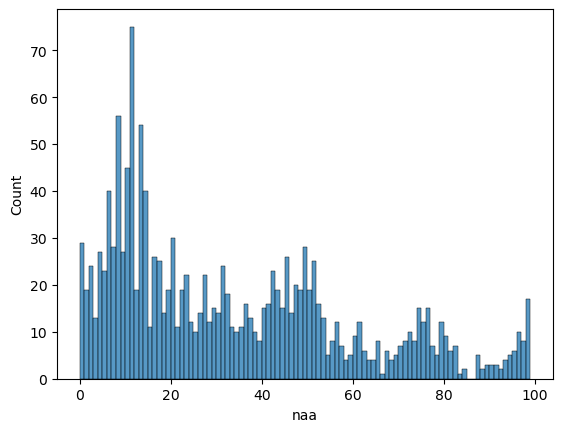

In [30]:
file = 'estaf.csv'

stations = pd.DataFrame()
for folder in folders:
    stations = pd.concat((stations, pd.read_csv(f'{folder}/{file}', sep=';', index_col='indroea', encoding='latin1')), axis=0)

# eliminar columnas vacías
stations.dropna(axis=1, how='all', inplace=True)
    
print('nº total de estaciones:\t\t{0}'.format(stations.shape[0]))
print('nº de estaciones en servicio:\t{0}'.format(stations.loc[stations.serv == 1].shape[0]))

sns.histplot(stations.naa, binwidth=1);

# exportar todas las estaciones juntas
stations.to_csv(file, sep=',')

In [38]:
(stations.serv == 2).sum()

0

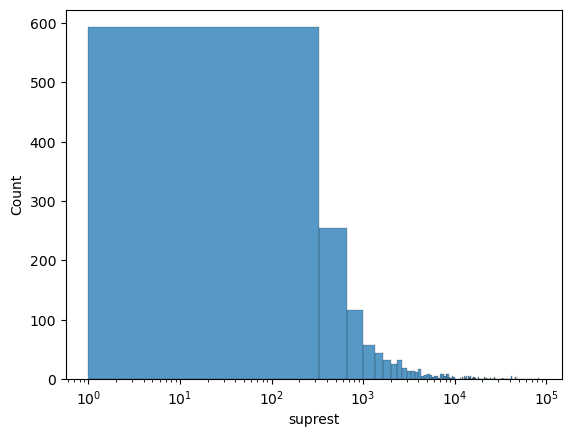

In [34]:
sns.histplot(stations.suprest);
plt.xscale('log')

### Embalses

In [13]:
file = 'embalse.csv'

reservoirs = pd.DataFrame()
for folder in folders:
    reservoirs = pd.concat((reservoirs, pd.read_csv(f'{folder}/{file}', sep=';', index_col='ref_ceh', encoding='latin1')), axis=0)

# eliminar columnas vacías
reservoirs.dropna(axis=1, how='all', inplace=True)
    
print('nº total de embalses:\t\t{0}'.format(reservoirs.shape[0]))
print('nº de embalses en servicio:\t{0}'.format(reservoirs.loc[reservoirs.serv == 1].shape[0]))

# exportar todas las estaciones juntas
reservoirs.to_csv(file, sep=',')

nº total de embalses:		394
nº de embalses en servicio:	363
